In [1]:
import random
random.seed(0)
import numpy as np
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(0)

In [2]:
import os
import json
from zipfile import ZipFile
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,models

In [3]:
!pip install kaggle

Defaulting to user installation because normal site-packages is not writeable


In [4]:
kaggle_credentails = json.load(open("C://Users//DELL//.kaggle//kaggle.json"))

In [5]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [6]:
pip install kagglehub[pandas-datasets]

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [8]:
with ZipFile("C://Users//DELL//Desktop//plant disease//kaggle dataset (2).zip", 'r') as zip_ref:
    zip_ref.extractall()

In [9]:
print(os.listdir("C://Users//DELL//Desktop//plant disease//kaggle dataset"))


print(len(os.listdir("C://Users//DELL//Desktop//plant disease//kaggle dataset//plantvillage dataset//segmented")))
print(os.listdir("C://Users//DELL//Desktop//plant disease//kaggle dataset//plantvillage dataset//segmented")[:5])

print(len(os.listdir("C://Users//DELL//Desktop//plant disease//kaggle dataset//plantvillage dataset//color")))
print(os.listdir("C://Users//DELL//Desktop//plant disease//kaggle dataset//plantvillage dataset//color")[:5])

print(len(os.listdir("C://Users//DELL//Desktop//plant disease//kaggle dataset//plantvillage dataset//grayscale")))
print(os.listdir("C://Users//DELL//Desktop//plant disease//kaggle dataset//plantvillage dataset//grayscale")[:5])

['plantvillage dataset']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']


In [10]:
print(len(os.listdir("C://Users//DELL//Desktop//plant disease//kaggle dataset//plantvillage dataset//color//Grape___healthy")))
print(os.listdir("C://Users//DELL//Desktop//plant disease//kaggle dataset//plantvillage dataset//color//Grape___healthy")[:5])

423
['00e00912-bf75-4cf8-8b7d-ad64b73bea5f___Mt.N.V_HL 6067.JPG', '0163a6aa-fbf8-47c5-965f-59b6efe8bfe5___Mt.N.V_HL 6103.JPG', '0294ca65-4c29-44be-af28-501df9f715e8___Mt.N.V_HL 6176.JPG', '02f95acb-5d92-4f2a-b7ec-3af8709ee7c9___Mt.N.V_HL 9078.JPG', '03027791-26bb-4c46-960e-8df76e27042c___Mt.N.V_HL 6070.JPG']


In [11]:
# Dataset Path
base_dir = 'C://Users//DELL//Desktop//plant disease//kaggle dataset//plantvillage dataset//color'

(256, 256, 3)


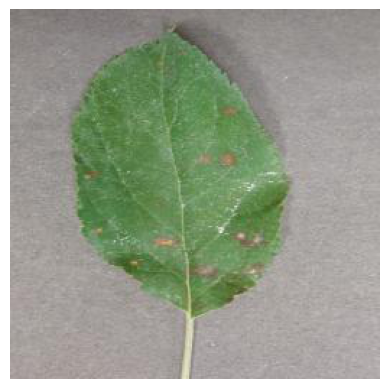

In [12]:
image_path = 'C://Users//DELL//Desktop//plant disease//kaggle dataset//plantvillage dataset//color//Apple___Cedar_apple_rust//0a41c25a-f9a6-4c34-8e5c-7f89a6ac4c40___FREC_C.Rust 9807.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [13]:
image_path = 'C://Users//DELL//Desktop//plant disease//kaggle dataset//plantvillage dataset//color//Apple___Cedar_apple_rust//0a41c25a-f9a6-4c34-8e5c-7f89a6ac4c40___FREC_C.Rust 9807.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[129 124 121]
  [131 126 123]
  [131 126 123]
  ...
  [140 136 133]
  [134 130 127]
  [130 126 123]]

 [[131 126 123]
  [133 128 125]
  [132 127 124]
  ...
  [142 138 135]
  [141 137 134]
  [140 136 133]]

 [[122 117 114]
  [124 119 116]
  [127 122 119]
  ...
  [142 138 135]
  [145 141 138]
  [146 142 139]]

 ...

 [[161 151 150]
  [163 153 152]
  [165 155 154]
  ...
  [175 169 169]
  [179 173 173]
  [182 176 176]]

 [[160 150 149]
  [163 153 152]
  [167 157 156]
  ...
  [174 168 168]
  [175 169 169]
  [177 171 171]]

 [[172 162 161]
  [172 162 161]
  [172 162 161]
  ...
  [172 166 166]
  [170 164 164]
  [169 163 163]]]


In [14]:
# Image Parameters
img_size = 224
batch_size = 32

In [15]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [16]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [17]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


In [18]:
from tensorflow.keras import layers, models, Input

model = models.Sequential([
    Input(shape=(img_size, img_size, 3)),  # Explicit input layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1184s 868ms/step - accuracy: 0.6084 - loss: 1.5788 - val_accuracy: 0.8461 - val_loss: 0.4839
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1024s 754ms/step - accuracy: 0.9227 - loss: 0.2471 - val_accuracy: 0.8607 - val_loss: 0.4597
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1295s 954ms/step - accuracy: 0.9656 - loss: 0.1074 - val_accuracy: 0.8608 - val_loss: 0.5319
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1186s 874ms/step - accuracy: 0.9807 - loss: 0.0609 - val_accuracy: 0.8865 - val_loss: 0.4527
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1272s 937ms/step - accuracy: 0.9827 - loss: 0.0544 - val_accuracy: 0.8759 - val_loss: 0.5848


In [22]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 79s 232ms/step - accuracy: 0.8760 - loss: 0.5628
Validation Accuracy: 87.60%


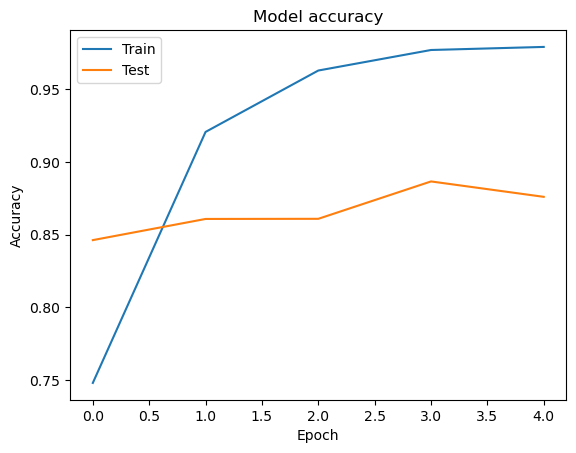

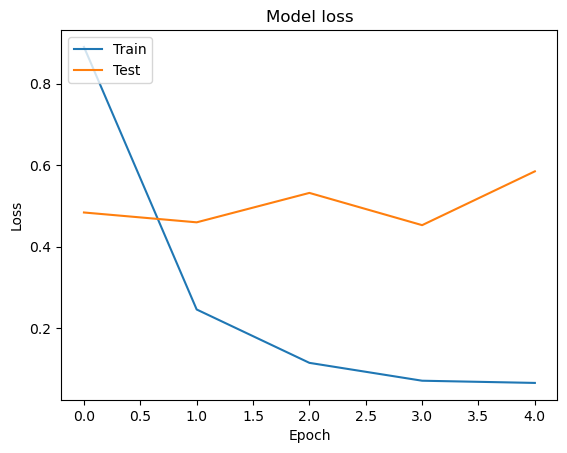

In [23]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [24]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [25]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [26]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [27]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [37]:
# Example Usage
image_path = 'test_apple_black_rot.JPG'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Predicted Class Name: Apple___Black_rot
